In [1]:
from email import policy

import numpy as np
import random
import torch

import matplotlib.pyplot as plt

from dqn import DQNAgent

In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

In [3]:
SEEDS = [0]

## CartPole

### LR

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
cp_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.99
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cp_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cp_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
cpt_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=800,
            batch_size=64,
            num_steps=500,
            num_layers=2,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.05,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.99
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cpt_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN with Soft Update Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN with Soft Update Learning Rate Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cpt_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

### Eps Decay

In [5]:
eps_decay_list = [0.99, 0.995, 0.999]
cp_results_eps = {}
agents = []

for eps_decay in eps_decay_list:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("eps_decay = ", eps_decay, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="CartPole-v1",
            hidden_dim=128,
            episodes=1000,
            batch_size=64,
            num_steps=500,
            num_layers=3,
            learning_rate=1e-3,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=eps_decay
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)
        agents.append(dqn_agent)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    cp_results_eps[f"eps_decay={eps_decay}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

eps_decay =  0.99 seed =  0
eps_decay =  0.995 seed =  0
eps_decay =  0.999 seed =  0


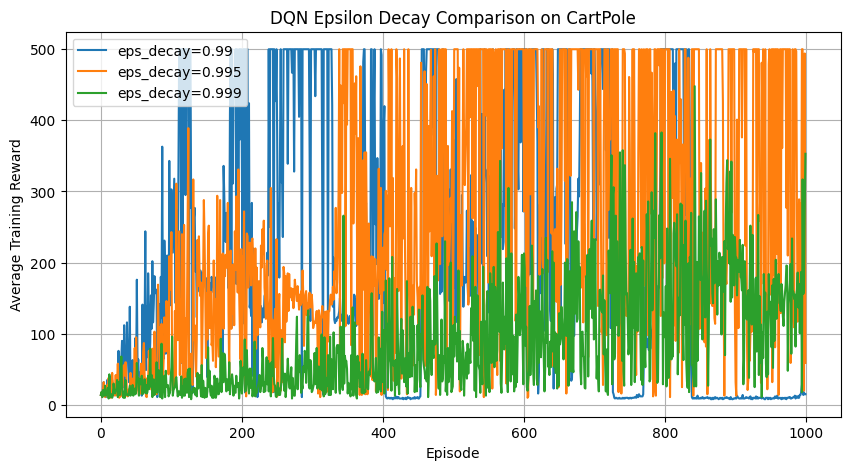

In [6]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_eps.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Epsilon Decay Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

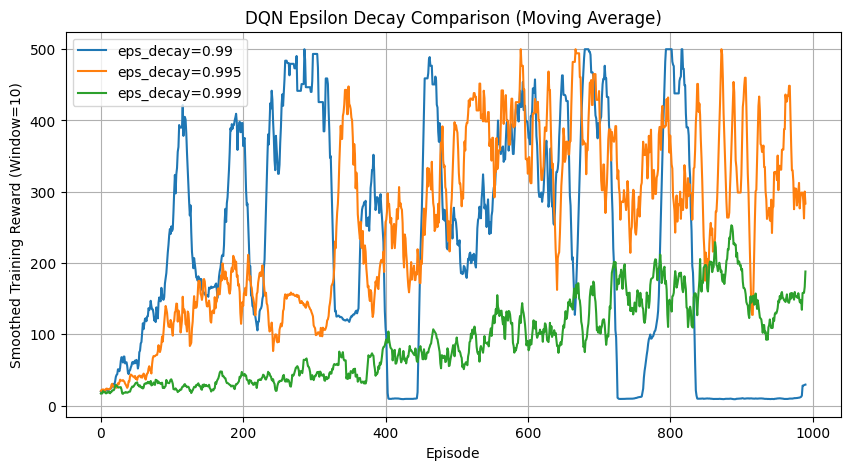

In [7]:
window_size = 10

plt.figure(figsize=(10, 5))
for lr, result in cp_results_eps.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Epsilon Decay Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

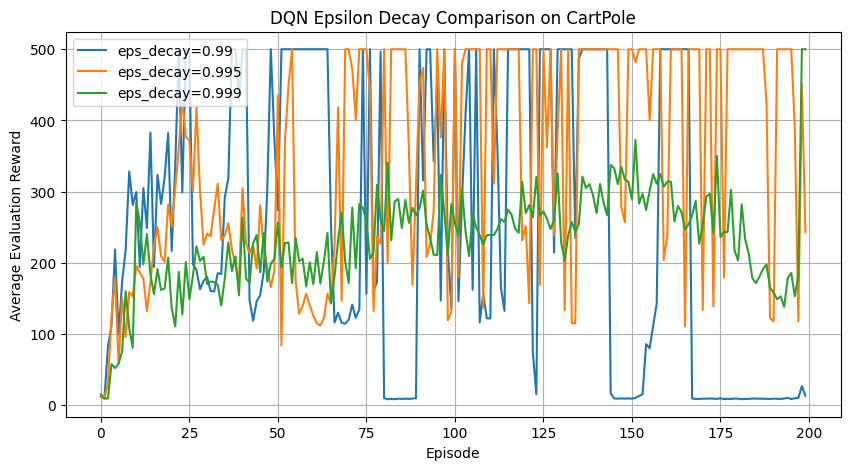

In [8]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in cp_results_eps.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Epsilon Decay Comparison on CartPole")
plt.legend()
plt.grid()
plt.show()

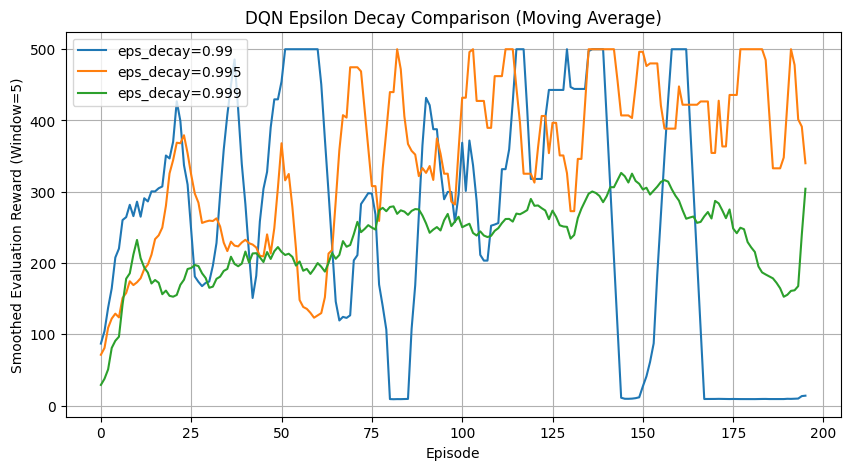

In [9]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in cp_results_eps.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Evaluation Reward (Window={window_size})")
plt.title("DQN Epsilon Decay Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

## MountainCar Env

### Learning Rate

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
mc_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="MountainCar-v0",
            hidden_dim=128,
            episodes=2000,
            batch_size=64,
            num_steps=200,
            num_layers=4,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 1.0,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.995
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mc_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mc_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
lrs = [3e-3, 1e-3, 3e-4]
mct_results_lr = {}

for lr in lrs:
    all_train_rewards = []
    all_eval_rewards = []
    for seed in SEEDS:
        print("lr = ", lr, "seed = ", seed)
        set_seed(seed)

        dqn_agent = DQNAgent(
            env_name="MountainCar-v0",
            hidden_dim=128,
            episodes=2000,
            batch_size=64,
            num_steps=200,
            num_layers=4,
            learning_rate=lr,
            eval_interval=5,
            epsilon=1.0,
            tau = 0.05,
            gamma = 0.99,
            epsilon_min=0.05,
            epsilon_decay=0.995
        )

        rewards_history, eval_rewards_history = dqn_agent.train_with_seed(seed=seed)

        all_train_rewards.append(rewards_history)
        all_eval_rewards.append(eval_rewards_history)

    all_train_rewards = np.array(all_train_rewards)
    avg_train_rewards = all_train_rewards.mean(axis=0)

    all_eval_rewards = np.array(all_eval_rewards)
    avg_eval_rewards = all_eval_rewards.mean(axis=0)

    mct_results_lr[f"LR={lr}"] = {
        "avg_train_rewards": avg_train_rewards,
        "avg_eval_rewards": avg_eval_rewards
    }

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    plt.plot(result["avg_train_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Training Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    rewards = result["avg_train_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Plot results
plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    plt.plot(result["avg_eval_rewards"], label=lr)
plt.xlabel("Episode")
plt.ylabel("Average Evaluation Reward")
plt.title("DQN Learning Rate Comparison on MountainCar")
plt.legend()
plt.grid()
plt.show()

In [ ]:
window_size = 5

plt.figure(figsize=(10, 5))
for lr, result in mct_results_lr.items():
    rewards = result["avg_eval_rewards"]
    # Compute moving average
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    episodes = np.arange(len(smoothed_rewards))
    plt.plot(episodes, smoothed_rewards, label=f"{lr}")

plt.xlabel("Episode")
plt.ylabel(f"Smoothed Training Reward (Window={window_size})")
plt.title("DQN Learning Rate Comparison (Moving Average)")
plt.legend()
plt.grid()
plt.show()

After training, test the final policy over 10–20 episodes with no exploration noise
Compute:
Mean return
Standard deviation

In [14]:
mean_reward, std_reward = agents[2].evaluate_policy()

Episode 0, Eval return: 500.00
Episode 1, Eval return: 500.00
Episode 2, Eval return: 500.00
Episode 3, Eval return: 500.00
Episode 4, Eval return: 500.00
Episode 5, Eval return: 500.00
Episode 6, Eval return: 500.00
Episode 7, Eval return: 500.00
Episode 8, Eval return: 500.00
Episode 9, Eval return: 500.00
Episode 10, Eval return: 500.00
Episode 11, Eval return: 500.00
Episode 12, Eval return: 500.00
Episode 13, Eval return: 500.00
Episode 14, Eval return: 500.00
Episode 15, Eval return: 500.00
Episode 16, Eval return: 500.00
Episode 17, Eval return: 500.00
Episode 18, Eval return: 500.00
Episode 19, Eval return: 500.00


In [15]:
mean_reward, std_reward

(np.float64(500.0), np.float64(0.0))

 Off-Policy Data Efficiency (Buffer Experiments)

✅ What to Measure:
For off-policy methods (DQN, TD3, SAC), test:
Different replay buffer sizes
Different update-to-sample ratios (e.g., 1:1 vs. 10:1)
For PPO, try reusing old data (should degrade performance)
📈 How to Report:
Reward vs. buffer size or reuse amount
Show curves/tables to highlight sensitivity
🎯 Why:
Measures how well each method reuses past experience

Time per training step (computational efficiency)